<a href="https://colab.research.google.com/github/IIIaryanIII/Predicting-House-Prices/blob/main/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camugent/california-house-prices
!unzip california-house-prices.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open california-house-prices.zip, california-house-prices.zip.zip or california-house-prices.zip.ZIP.


In [2]:
import pandas as pd
housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [4]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [5]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [6]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [7]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [8]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                     'total_bedrooms',	'population',
                                     'households',	'median_income',
                                     '<1H OCEAN',
                                     'INLAND',	'ISLAND',
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [9]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [10]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [31]:
X_train, y_train = train_pd.to_numpy()[:, :-1].astype('float32'), train_pd.to_numpy()[:, -1].astype('float32')
X_val, y_val = val_pd.to_numpy()[:, :-1].astype('float32'), val_pd.to_numpy()[:, -1].astype('float32')
X_test, y_test = test_pd.to_numpy()[:, :-1].astype('float32'), test_pd.to_numpy()[:, -1].astype('float32')

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [13]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [19]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.27684,0.328234,-0.326667,True,False,False,False,False
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,False,True,False,False,False
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,False,False,False,True,False
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.07974,-1.082862,-1.235508,False,False,False,True,False
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,True,False,False,False,False


<Axes: >

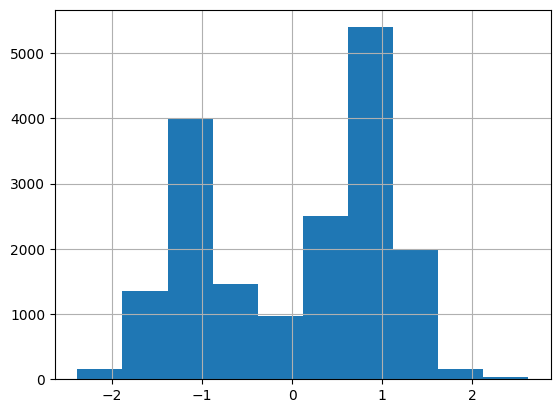

In [20]:
pd.DataFrame(X_train)[0].hist()

In [22]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import numpy as np # Import numpy for sqrt

lm = LinearRegression().fit(X_train, y_train)
np.sqrt(mse(lm.predict(X_train), y_train)), np.sqrt(mse(lm.predict(X_val), y_val))

(np.float64(68593.05578127236), np.float64(71382.43558330165))

In [26]:
from sklearn.neighbors import KNeighborsRegressor
 # Ensure numpy is imported for sqrt

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
np.sqrt(mse(knn.predict(X_train), y_train)), np.sqrt(mse(knn.predict(X_val), y_val))

(np.float64(53759.09908812057), np.float64(62161.22860469906))

In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
np.sqrt(mse(rfr.predict(X_train), y_train)), np.sqrt(mse(rfr.predict(X_val), y_val))

(np.float64(43499.23215328302), np.float64(53371.78515993761))

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
np.sqrt(mse(gbr.predict(X_train), y_train)), np.sqrt(mse(gbr.predict(X_val), y_val))

(np.float64(47274.82259072158), np.float64(51184.485508056685))

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 56249249792.0000 - root_mean_squared_error: 237167.5000 - val_loss: 56489377792.0000 - val_root_mean_squared_error: 237674.9375
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 56396877824.0000 - root_mean_squared_error: 237468.3906 - val_loss: 56466161664.0000 - val_root_mean_squared_error: 237626.0938
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56424579072.0000 - root_mean_squared_error: 237533.9688 - val_loss: 56442949632.0000 - val_root_mean_squared_error: 237577.2500
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55738449920.0000 - root_mean_squared_error: 236082.7188 - val_loss: 56419721216.0000 - val_root_mean_squared_error: 237528.3594
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 56042618880.0000 - root_mean_squared_error: 236721.9531 - val_loss: 56396488704.0000 - val_root_mean_squared_error: 237479.4531
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - 

In [38]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
np.sqrt(mse(gbr.predict(X_train), y_train)), np.sqrt(mse(gbr.predict(X_val), y_val))

ValueError: File format not supported: filepath=models/simple_nn. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(models/simple_nn, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [34]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=models/medium_nn

In [42]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

ValueError: File format not supported: filepath=models/medium_nn. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(models/medium_nn, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [41]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=models/large_nn

In [40]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

ValueError: File format not supported: filepath=models/large_nn. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(models/large_nn, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [39]:
mse(gbr.predict(X_test), y_test, squared=False)

TypeError: got an unexpected keyword argument 'squared'